1. Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset

Reference
https://inside-machinelearning.com/en/how-to-do-linear-regression-with-keras/

In [55]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [56]:
data=pd.read_csv("Boston.csv")
data

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [57]:
data.drop(["Unnamed: 0"],axis=1, inplace=True)

In [58]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [59]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

<AxesSubplot:>

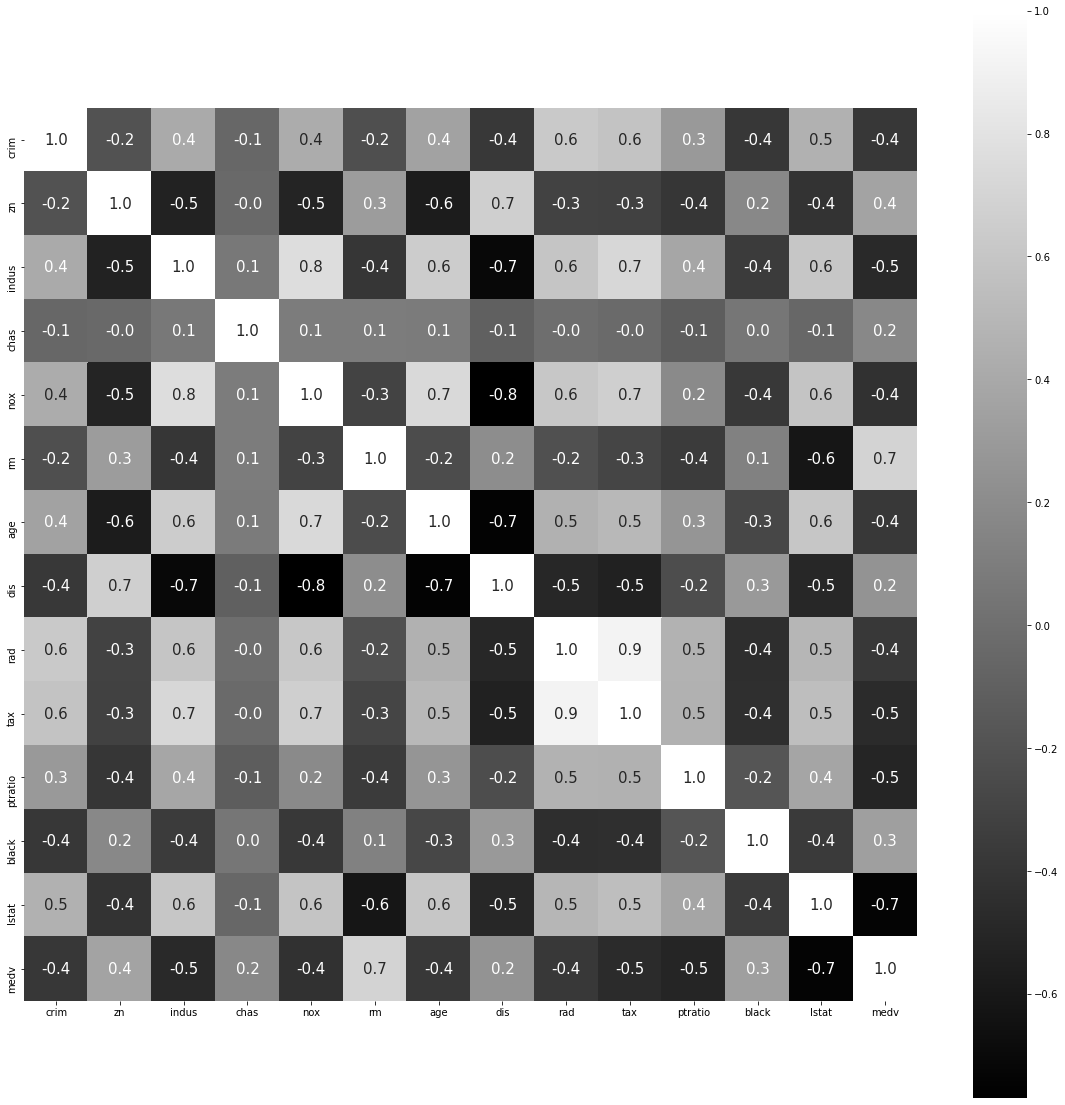

In [60]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='gray')

In [61]:
y = data['medv']

In [62]:
X =data.drop(['medv'], axis = 1,inplace=True) #iloc[:,:-1]


In [67]:
X=data
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [68]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [69]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [71]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate the scaler and fit to training dataset, X_train
scaler = MinMaxScaler()
scaler.fit(X_train)

# Replace unscaled values with scaled values
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [73]:
model = Sequential()
model.add(Dense(64, input_dim =13, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(54, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(1))

In [74]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

In [75]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200)

Epoch 1/200
9/9 [==============================] - 3s 85ms/step - loss: 553.6369 - mse: 553.6369 - mae: 21.8945 - val_loss: 570.6288 - val_mse: 570.6288 - val_mae: 22.1529
Epoch 2/200
9/9 [==============================] - 0s 13ms/step - loss: 526.1669 - mse: 526.1669 - mae: 21.2400 - val_loss: 531.2755 - val_mse: 531.2755 - val_mae: 21.2421
Epoch 3/200
9/9 [==============================] - 0s 14ms/step - loss: 469.4230 - mse: 469.4230 - mae: 19.8169 - val_loss: 439.6802 - val_mse: 439.6802 - val_mae: 18.9377
Epoch 4/200
9/9 [==============================] - 0s 12ms/step - loss: 343.6676 - mse: 343.6676 - mae: 16.2650 - val_loss: 262.7037 - val_mse: 262.7037 - val_mae: 13.6042
Epoch 5/200
9/9 [==============================] - 0s 13ms/step - loss: 165.7092 - mse: 165.7092 - mae: 10.0640 - val_loss: 100.0230 - val_mse: 100.0230 - val_mae: 7.3939
Epoch 6/200
9/9 [==============================] - 0s 13ms/step - loss: 132.3277 - mse: 132.3277 - mae: 8.9023 - val_loss: 90.9523 - val_mse:

Epoch 50/200
9/9 [==============================] - 0s 14ms/step - loss: 26.3884 - mse: 26.3884 - mae: 3.8492 - val_loss: 25.1309 - val_mse: 25.1309 - val_mae: 3.1685
Epoch 51/200
9/9 [==============================] - 0s 13ms/step - loss: 25.3507 - mse: 25.3507 - mae: 3.7403 - val_loss: 30.8951 - val_mse: 30.8951 - val_mae: 3.3723
Epoch 52/200
9/9 [==============================] - 0s 13ms/step - loss: 23.1303 - mse: 23.1303 - mae: 3.5515 - val_loss: 25.3434 - val_mse: 25.3434 - val_mae: 3.1628
Epoch 53/200
9/9 [==============================] - 0s 14ms/step - loss: 29.4174 - mse: 29.4174 - mae: 4.0028 - val_loss: 35.9193 - val_mse: 35.9193 - val_mae: 3.8148
Epoch 54/200
9/9 [==============================] - 0s 14ms/step - loss: 28.6524 - mse: 28.6524 - mae: 4.0297 - val_loss: 24.2159 - val_mse: 24.2159 - val_mae: 3.2451
Epoch 55/200
9/9 [==============================] - 0s 17ms/step - loss: 25.7277 - mse: 25.7277 - mae: 3.8863 - val_loss: 27.8931 - val_mse: 27.8931 - val_mae: 3.167

9/9 [==============================] - 0s 14ms/step - loss: 20.9099 - mse: 20.9099 - mae: 3.3895 - val_loss: 17.1227 - val_mse: 17.1227 - val_mae: 2.5821
Epoch 100/200
9/9 [==============================] - 0s 15ms/step - loss: 18.0941 - mse: 18.0941 - mae: 3.2064 - val_loss: 20.5357 - val_mse: 20.5357 - val_mae: 2.8044
Epoch 101/200
9/9 [==============================] - 0s 13ms/step - loss: 23.2145 - mse: 23.2145 - mae: 3.5121 - val_loss: 16.8521 - val_mse: 16.8521 - val_mae: 2.6972
Epoch 102/200
9/9 [==============================] - 0s 14ms/step - loss: 20.6467 - mse: 20.6467 - mae: 3.4190 - val_loss: 18.9577 - val_mse: 18.9577 - val_mae: 2.6911
Epoch 103/200
9/9 [==============================] - 0s 13ms/step - loss: 20.2973 - mse: 20.2973 - mae: 3.2301 - val_loss: 17.0190 - val_mse: 17.0190 - val_mae: 2.5734
Epoch 104/200
9/9 [==============================] - 0s 14ms/step - loss: 16.6534 - mse: 16.6534 - mae: 3.1376 - val_loss: 18.8338 - val_mse: 18.8338 - val_mae: 2.7011
Epoch 

Epoch 148/200
9/9 [==============================] - 0s 13ms/step - loss: 18.5733 - mse: 18.5733 - mae: 3.2972 - val_loss: 14.9084 - val_mse: 14.9084 - val_mae: 2.4824
Epoch 149/200
9/9 [==============================] - 0s 14ms/step - loss: 16.6973 - mse: 16.6973 - mae: 3.0660 - val_loss: 17.4988 - val_mse: 17.4988 - val_mae: 2.6769
Epoch 150/200
9/9 [==============================] - 0s 14ms/step - loss: 19.2930 - mse: 19.2930 - mae: 3.2355 - val_loss: 15.8223 - val_mse: 15.8223 - val_mae: 2.5420
Epoch 151/200
9/9 [==============================] - 0s 13ms/step - loss: 18.3389 - mse: 18.3389 - mae: 3.3248 - val_loss: 18.0216 - val_mse: 18.0216 - val_mae: 2.6830
Epoch 152/200
9/9 [==============================] - 0s 16ms/step - loss: 16.4026 - mse: 16.4026 - mae: 3.1702 - val_loss: 15.1442 - val_mse: 15.1442 - val_mae: 2.4477
Epoch 153/200
9/9 [==============================] - 0s 15ms/step - loss: 17.4563 - mse: 17.4563 - mae: 3.1745 - val_loss: 17.4282 - val_mse: 17.4282 - val_mae:

Epoch 197/200
9/9 [==============================] - 0s 15ms/step - loss: 15.0025 - mse: 15.0025 - mae: 2.9200 - val_loss: 14.6046 - val_mse: 14.6046 - val_mae: 2.5637
Epoch 198/200
9/9 [==============================] - 0s 13ms/step - loss: 13.9068 - mse: 13.9068 - mae: 2.8664 - val_loss: 16.0592 - val_mse: 16.0592 - val_mae: 2.5428
Epoch 199/200
9/9 [==============================] - 0s 13ms/step - loss: 15.2111 - mse: 15.2111 - mae: 2.8265 - val_loss: 14.5741 - val_mse: 14.5741 - val_mae: 2.3954
Epoch 200/200
9/9 [==============================] - 0s 12ms/step - loss: 15.1983 - mse: 15.1983 - mae: 2.9289 - val_loss: 14.8053 - val_mse: 14.8053 - val_mae: 2.4488


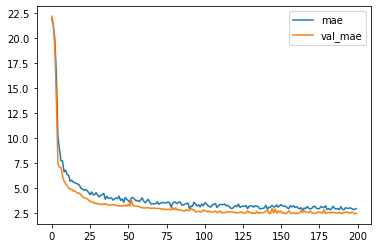

In [76]:
import matplotlib.pyplot as plt

#plot the loss and validation loss of the dataset
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()

In [77]:
scores = model.evaluate(X_test, y_test, verbose = 0)

print('Mean Squared Error : ', scores[1])
print('Mean Absolute Error : ', scores[2])

Mean Squared Error :  17.483383178710938
Mean Absolute Error :  2.634615898132324


In [78]:
Y_pred = model.predict(X_test)
Y_pred

5/5 [==============================] - 0s 4ms/step


array([[16.136461 ],
       [24.084326 ],
       [19.39327  ],
       [17.89187  ],
       [42.66026  ],
       [25.149817 ],
       [31.321192 ],
       [19.12264  ],
       [14.838706 ],
       [19.286545 ],
       [26.180496 ],
       [26.082094 ],
       [18.624638 ],
       [35.209824 ],
       [20.628311 ],
       [12.863294 ],
       [19.89389  ],
       [12.373683 ],
       [11.033136 ],
       [14.378315 ],
       [ 7.191353 ],
       [17.677755 ],
       [20.054472 ],
       [20.767496 ],
       [18.79018  ],
       [19.621616 ],
       [17.577427 ],
       [15.47442  ],
       [20.679451 ],
       [17.7958   ],
       [12.677394 ],
       [21.966513 ],
       [33.439877 ],
       [21.14894  ],
       [16.47906  ],
       [16.420748 ],
       [31.919382 ],
       [41.119736 ],
       [21.765581 ],
       [24.030098 ],
       [39.08821  ],
       [33.132484 ],
       [15.870476 ],
       [30.588154 ],
       [30.087004 ],
       [20.977102 ],
       [45.676746 ],
       [19.47

In [79]:
from sklearn.metrics import r2_score

print('r2 score: ', r2_score(y_test,Y_pred))

r2 score:  0.8325668140381447


5/5 [==============================] - 0s 4ms/step


[]

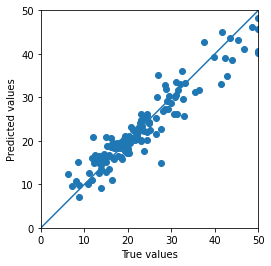

In [80]:
Y_pred = model.predict(X_test)

a = plt.axes(aspect='equal')

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.plot([0, 50], [0,50])
plt.scatter(y_test,Y_pred)
plt.plot()

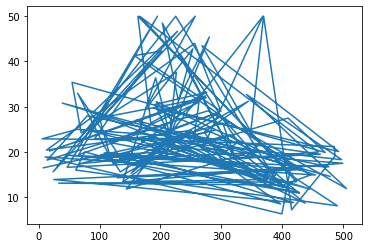

In [81]:
plt.plot(y_test)


Using ML MODEL lm for Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [87]:
# Value of y intercept
lm.intercept_

27.380936280008477

In [88]:
coeffcients = pd.DataFrame([X.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,crim,-10.90502
1,zn,5.56777
2,indus,-0.238526
3,chas,4.693448
4,nox,-7.01579
5,rm,15.865749
6,age,-0.33478
7,dis,-17.068774
8,rad,7.503741
9,tax,-7.370872


In [89]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [90]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.0898610949711287
MSE: 19.07368870346903
RMSE: 4.367343437774162


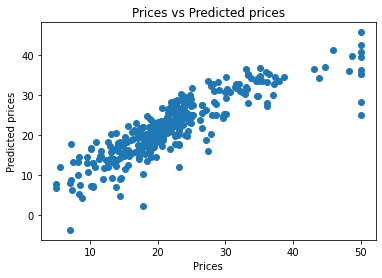

In [91]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

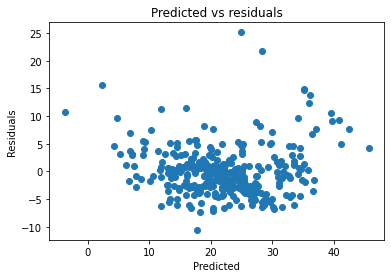

In [92]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


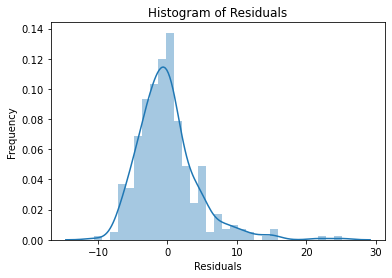

In [93]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [94]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [95]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7121818377409194
Adjusted R^2: 0.6850685326005712
MAE: 3.859005592370743
MSE: 30.053993307124145
RMSE: 5.482152251362976
